Headers from /home/declan/RPI/zwo/exposure-20250816-125904-357.fits:

--- Extension: PRIMARY ---
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3096                                                  
NAXIS2  =                 2080                                                  
EXTEND  =                    T                                                  
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
DATE-OBS= '2025-08-16T12:59:04.357Z'                                            


--- Extension: RED ---
XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   16 / array data type                    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


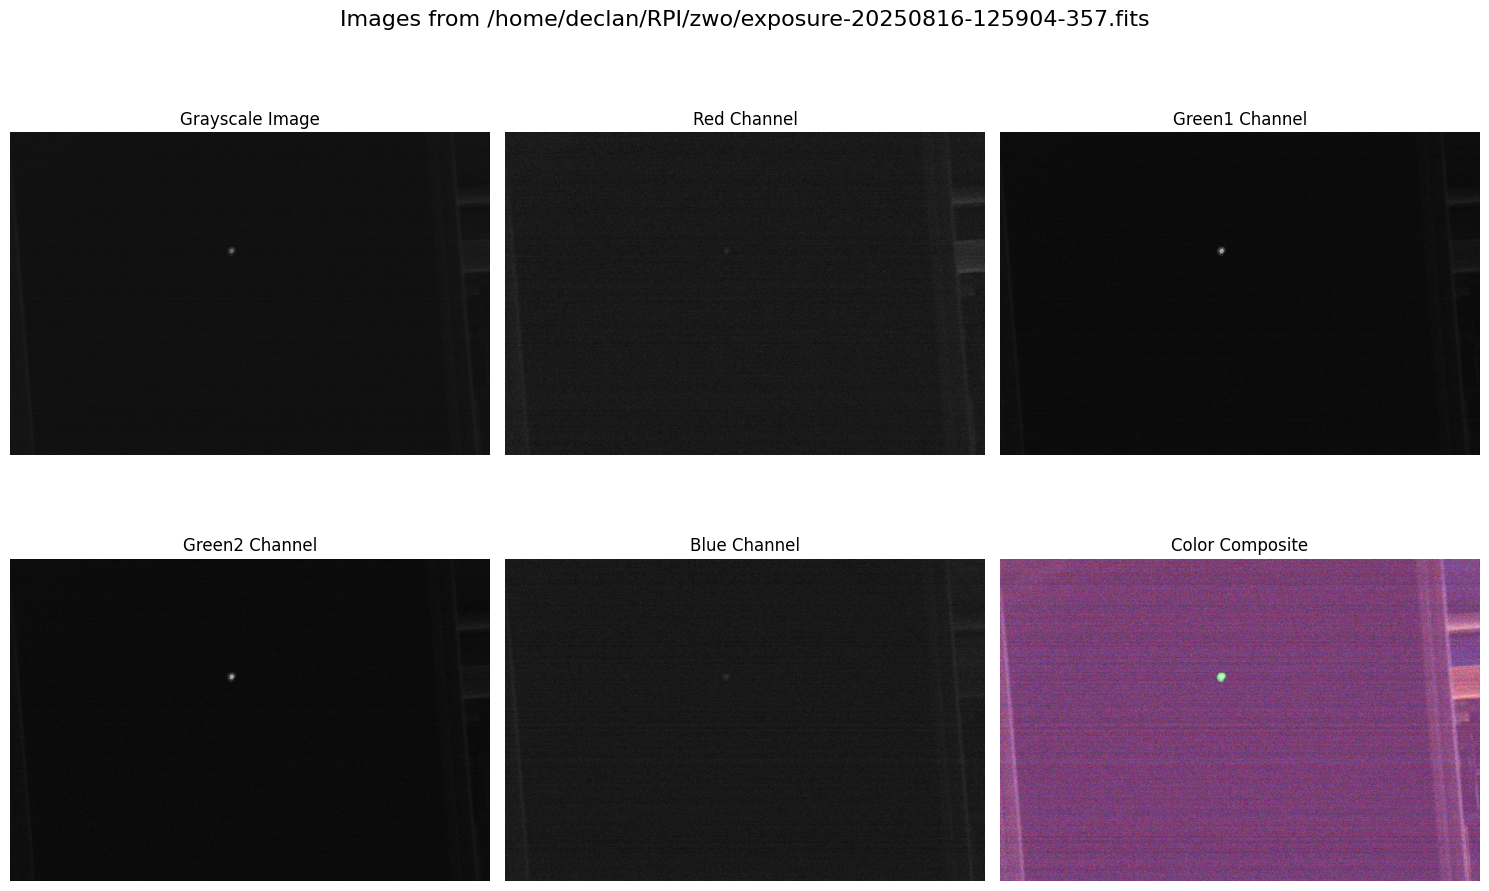

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Function to load and display all images from a FITS file
def read_fits_images(fits_file):
    # Open the FITS file
    hdul = fits.open(fits_file)
    
    # Print header info for all extensions
    print(f"Headers from {fits_file}:\n")
    for hdu in hdul:
        print(f"--- Extension: {hdu.name} ---")
        print(repr(hdu.header))
        print("\n")
    
    # Get extension names
    extension_names = [hdu.name for hdu in hdul]
    
    # Create a figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f"Images from {fits_file}", fontsize=16)
    
    # Mapping of extensions to titles
    titles = {
        'PRIMARY': 'Grayscale Image',
        'RED': 'Red Channel',
        'GREEN1': 'Green1 Channel',
        'GREEN2': 'Green2 Channel',
        'BLUE': 'Blue Channel',
        'COLOR_COMPOSITE': 'Color Composite'
    }
    
    # Read and plot each image
    for i, ext in enumerate(extension_names):
        if ext in titles:  # Only process known extensions
            data = hdul[ext].data
            ax = axes[i // 3, i % 3]
            cmap = "gray" if ext != "COLOR_COMPOSITE" else None
            ax.imshow(data, cmap=cmap)
            ax.set_title(titles[ext])
            ax.axis("off")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    # Close the FITS file
    hdul.close()

# Example usage (replace with your FITS file path)
fits_file = "/home/declan/RPI/zwo/exposure-20250816-125904-357.fits"
read_fits_images(fits_file)